## Laptop Price Prediction (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pathlib import Path
from joblib import dump

In [3]:
dataset = pd.read_csv(Path(os.getcwd()).parent / 'data/dataset_cleaned.csv')

In [4]:
dataset['Connector Type'].head()

0    Wi-Fi, USB, Bluetooth
1    Wi-Fi, USB, Bluetooth
2    Wi-Fi, USB, Bluetooth
3    Wi-Fi, USB, Bluetooth
4    Wi-Fi, USB, Bluetooth
Name: Connector Type, dtype: object

In [4]:
dataset = dataset.drop(['Memory Technology', 'Colour', 'Processor Type', 'Brand', 'USB-C'], axis=1)

### Numeric and Categorical Features

In [5]:
# Numeric Features
numeric_features = dataset.select_dtypes(include=[np.number])
# Categorical Features
categorical_features = dataset.select_dtypes(include=['object'])
print("Numeric Features", numeric_features.columns)
print("Categorical Features", categorical_features.columns)

Numeric Features Index(['Price', 'Processor Speed', 'Processor Count', 'RAM Size',
       'Memory Clock Speed', 'Hard Drive Size', 'Number of USB 2.0 Ports',
       'Number of USB 3.0 Ports', 'Item Weight', 'GraphicsCardRAM',
       'Number of HDMI Ports', 'BatteryLife', 'Screen_Resolution_X',
       'Screen_Resolution_Y', 'is_SSD', 'is_HDD', 'HeadphoneJack', 'Wifi',
       'Bluetooth', 'HDMI', 'Ethernet', 'Thunderbolt', 'DedicatedGraphics',
       'IntegratedGraphics', 'Fingerprint', 'Webcam', 'SDCard', 'MSOffice',
       'Antivirus', 'XboxGamePass', 'BacklitKeyboard', 'RGBKeyboard',
       'Touchscreen', 'Stylus', 'Microphone', 'Numpad'],
      dtype='object')
Categorical Features Index(['Product Name', 'Form Factor', 'Processor Brand', 'Operating System',
       'Display Type'],
      dtype='object')


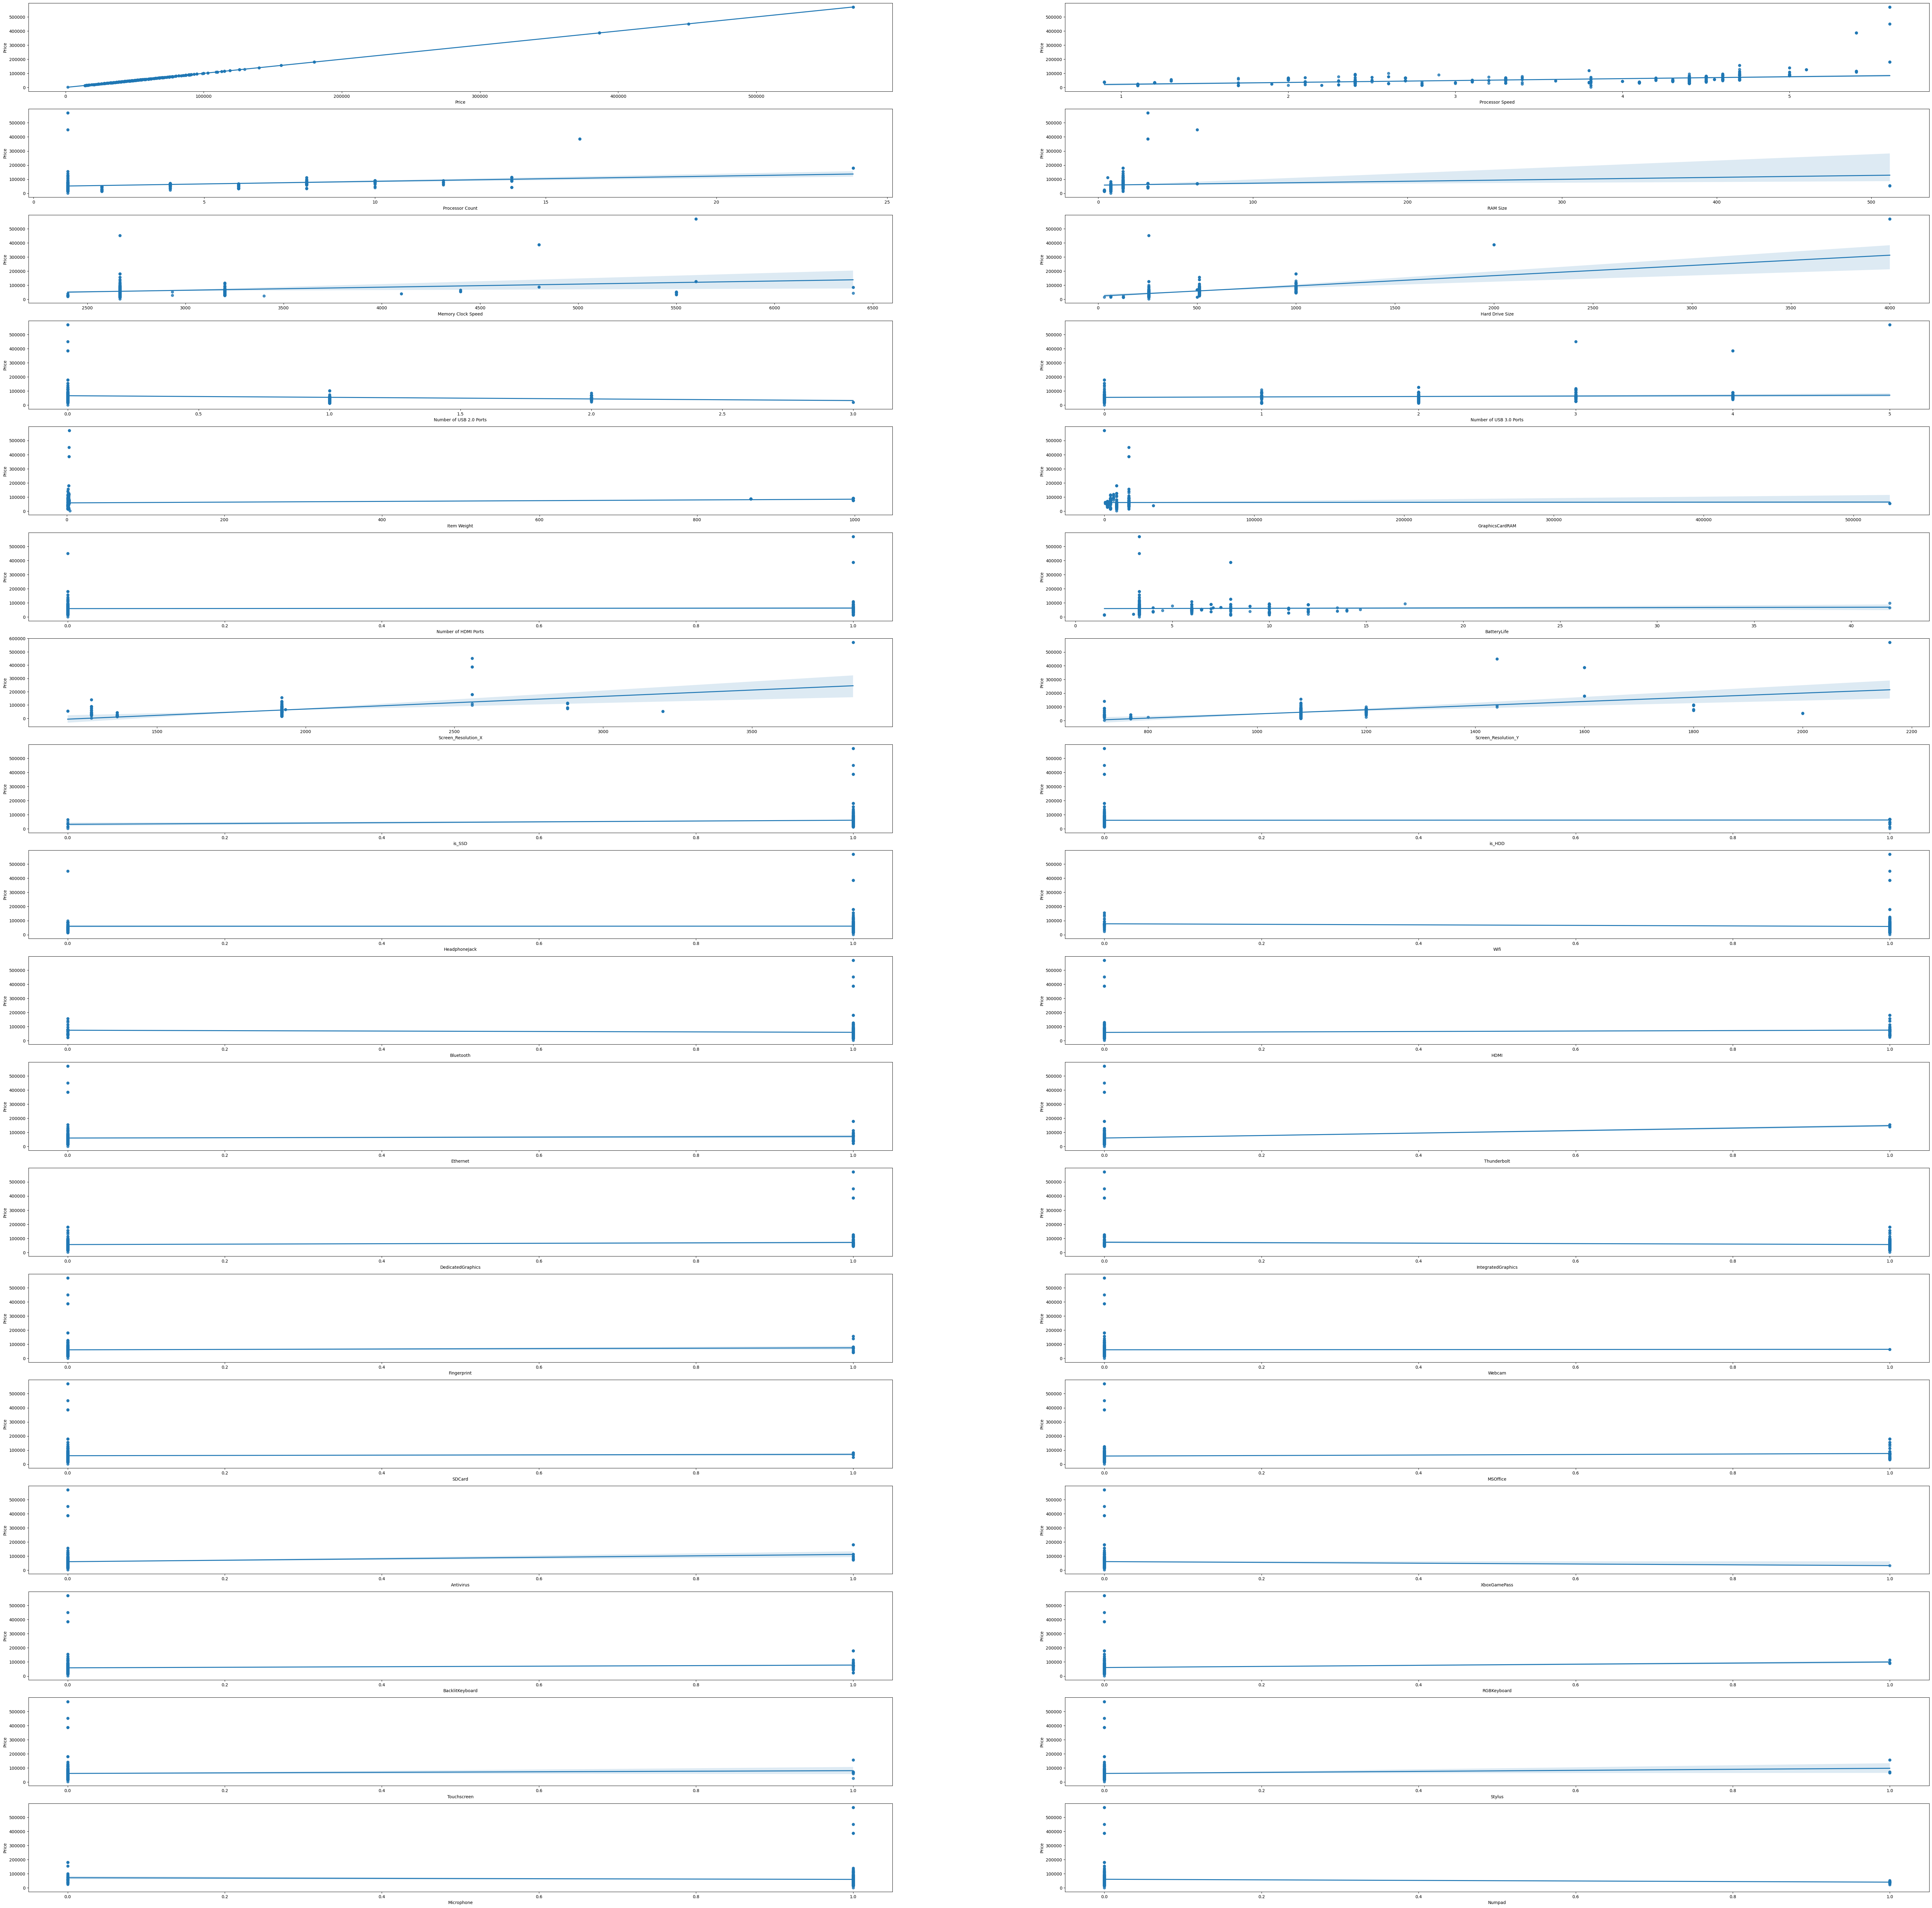

In [6]:
# Plot all variables vs Price using subplots
fig, axes = plt.subplots(nrows=18, ncols=2, figsize=(80, 80))
for i, column in enumerate(numeric_features.columns):
    sns.regplot(x=column, y='Price', data=dataset, ax=axes[i//2, i%2])

<Axes: >

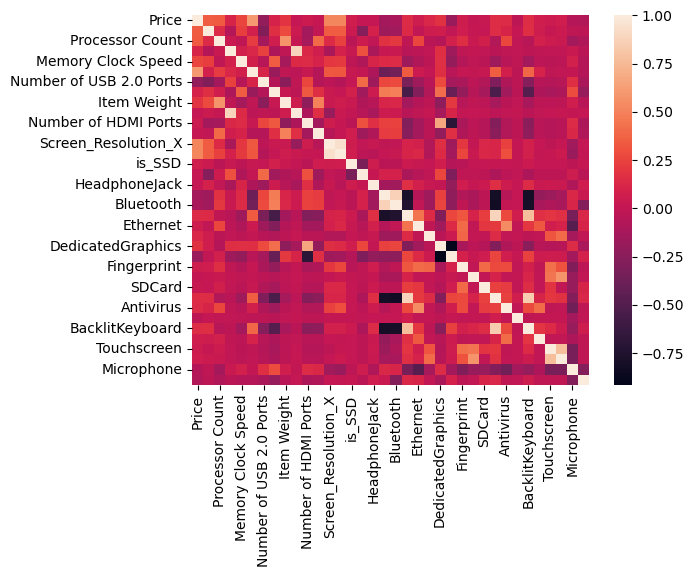

In [7]:
sns.heatmap(numeric_features.corr())

### Feature Engineering

In [8]:
dataset['SoftwareIncluded'] = dataset['MSOffice'] | dataset['Antivirus'] | dataset['XboxGamePass']
dataset['AdditionalInput'] = dataset['Touchscreen'] | dataset['Stylus']
dataset['USB_Ports'] = dataset['Number of USB 2.0 Ports'] + dataset['Number of USB 3.0 Ports']
dataset = dataset.drop(['Number of USB 2.0 Ports', 'Number of USB 3.0 Ports','MSOffice', 'Antivirus', 'XboxGamePass', 'Item Weight', 'Touchscreen', 'Stylus', 'Wifi', 'Ethernet', 'Bluetooth', 'Webcam', 'SDCard', 'Numpad', 'Microphone'], axis=1)

<Axes: >

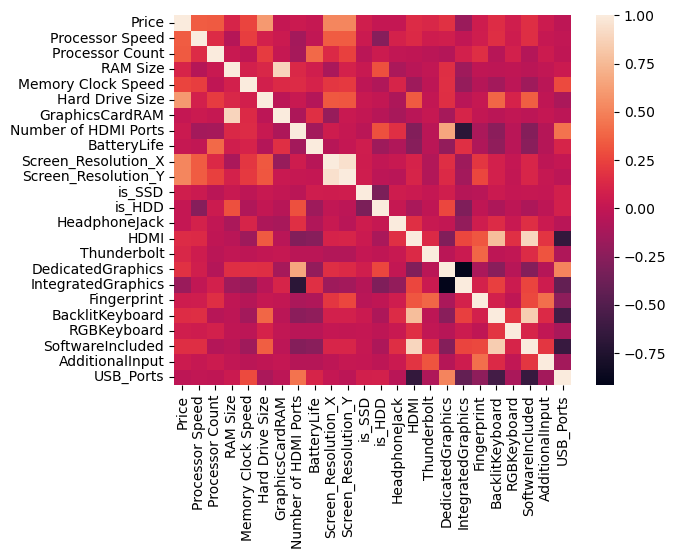

In [9]:
numeric_features = dataset.select_dtypes(include=[np.number])
sns.heatmap(numeric_features.corr())

### Data Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [11]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [13]:
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(), categorical_features)
    ]
)

X = preprocessor.fit_transform(X)

### Split for saving the Processed Dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Save Dataset

In [15]:
np.save(Path(os.getcwd()).parent / 'data/train.npy', np.concatenate((X_train, y_train.values.reshape(-1,1)), axis=1))
np.save(Path(os.getcwd()).parent / 'data/val.npy', np.concatenate((X_val, y_val.values.reshape(-1,1)), axis=1))
np.save(Path(os.getcwd()).parent / 'data/test.npy', np.concatenate((X_test, y_test.values.reshape(-1,1)), axis=1))

### Save Preprocessor

In [16]:
dump(preprocessor, Path(os.getcwd()).parent / 'models/preprocessor.joblib')

['/Users/abhiram.bsn/Development/AI-ML-DL/laptop_prediction/models/preprocessor.joblib']